# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [3]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [32]:
# Your code here
df=pd.read_csv("data/ames.csv", index_col=0)

The following code checks that you loaded the data correctly:

In [5]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [6]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

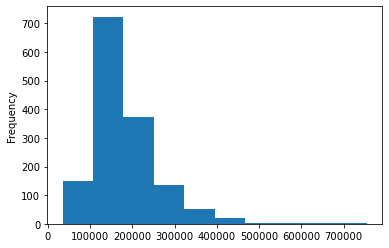

In [8]:
# Your code here

df['SalePrice'].plot(kind='hist');

Now, print out the mean, median, and standard deviation:

In [9]:
# Your code here
# df.describe()
print('Mean:', df['SalePrice'].mean())
print('Median:', df['SalePrice'].median())
print('Standard Deviation:', df['SalePrice'].std())

Mean: 180921.19589041095
Median: 163000.0
Standard Deviation: 79442.50288288662


In the cell below, interpret the above information.

In [10]:
# Replace None with appropriate text
"""
This is positively skewed dataset, most data falls to the right\n\nMean: The mean represents the average value of the dataset. In this case, the mean is 180,921.20. This means that if you were to add up all the values in the dataset and divide by the number of values, you would get 180,921.20.\n\nMedian: The median represents the middle value of the dataset. In this case, the median is 163,000. This means that half of the values in the dataset are above 163,000 and half are below.\n\nStandard Deviation: The standard deviation represents the amount of variation or dispersion in the dataset. In this case, the standard deviation is 79,442.50. This means that the values in the dataset are spread out over a range of approximately 79,442.50 around the mean.
"""

'\nThis is positively skewed dataset, most data falls to the right\n\nMean: The mean represents the average value of the dataset. In this case, the mean is 180,921.20. This means that if you were to add up all the values in the dataset and divide by the number of values, you would get 180,921.20.\n\nMedian: The median represents the middle value of the dataset. In this case, the median is 163,000. This means that half of the values in the dataset are above 163,000 and half are below.\n\nStandard Deviation: The standard deviation represents the amount of variation or dispersion in the dataset. In this case, the standard deviation is 79,442.50. This means that the values in the dataset are spread out over a range of approximately 79,442.50 around the mean.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

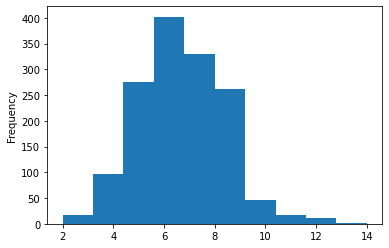

In [11]:
# Your code here
df["TotRmsAbvGrd"].plot(kind="hist");

Now, print out the mean, median, and standard deviation:

In [12]:
# Your code here
print("mean:",df["TotRmsAbvGrd"].mean())
print("median:",df["TotRmsAbvGrd"].median())
print("std:",df["TotRmsAbvGrd"].std())

mean: 6.517808219178082
median: 6.0
std: 1.6253932905840505


In the cell below, interpret the above information.

In [13]:
# Replace None with appropriate text
"""
Based on mean which is 6.517 implies that most of the total room above the ground are distributed around 6.5. half of them lies above and below 6 rooms which is the median.\nThe std is 1.63 which means the data is fairly spread out around the mean
"""

'\nBased on mean which is 6.517 implies that most of the total room above the ground are distributed around 6.5. half of them lies above and below 6 rooms which is the median.\nThe std is 1.63 which means the data is fairly spread out around the mean\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

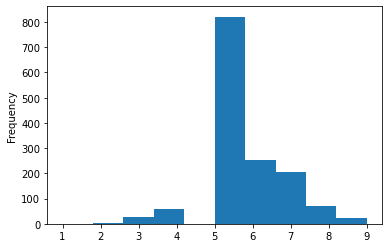

In [14]:
# Your code here
df["OverallCond"].plot(kind="hist");

Now, print out the mean, median, and standard deviation:

In [15]:
# Your code here
print("mean:",df["OverallCond"].mean())
print("median:",df["OverallCond"].median())
print("std:",df["OverallCond"].std())

mean: 5.575342465753424
median: 5.0
std: 1.1127993367127316


In the cell below, interpret the above information.

In [16]:
# Replace None with appropriate text
"""
In this data there is detection of outlier. the data also is negatively skewed.Overal condition of houses lies between 5.5 and its farely spread at std of 1.11 which translates half of the houses conditions lies below and above rating of 5
"""

'\nIn this data there is detection of outlier. the data also is negatively skewed.Overal condition of houses lies between 5.5 and its farely spread at std of 1.11 which translates half of the houses conditions lies below and above rating of 5\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [17]:
# Replace None with appropriate code
below_average_condition = df[df["OverallCond"] < 5]
average_condition = df[df["OverallCond"] == 5]
above_average_condition = df[df["OverallCond"] > 5]

The following code checks that you created the subsets correctly:

In [18]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

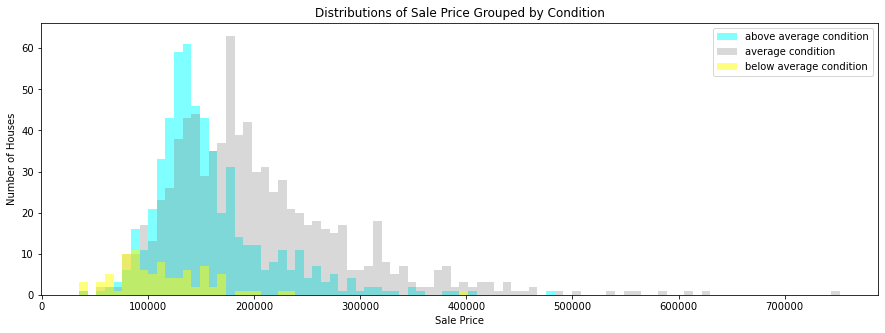

In [19]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [20]:
# Replace None with appropriate text
"""
Most of the houses are priced between 100000 to 300000. there is outliers in the same range. there is negative relationship between the price and the number of houses being sold in the dataset.the higher the price the lower the demand of the houses
"""

'\nMost of the houses are priced between 100000 to 300000. there is outliers in the same range. there is negative relationship between the price and the number of houses being sold in the dataset.the higher the price the lower the demand of the houses\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [21]:
# Your code here
import pandas as pd

# Load the full dataset
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')

# Only keep columns with numeric data types
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlations
correlations = df_numeric.corr()['price'].drop('price')
correlations_abs = correlations.abs()

# Find the column with the highest correlation (other than price)
max_corr_col = correlations_abs.idxmax()
max_corr_val = correlations.loc[max_corr_col]

# Print the results
print(f"Column with highest positive correlation (other than price): {max_corr_col}")
print(f"Pearson correlation coefficient: {max_corr_val:.3f}")

Column with highest positive correlation (other than price): sqft_living
Pearson correlation coefficient: 0.701


Now, find the ***most negatively correlated*** column:

In [22]:
# Your code here
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlations
correlations = df_numeric.corr()['price'].drop('price')
correlations_abs = correlations.abs()

# Find the column with the highest correlation (other than price)
min_corr_col = correlations_abs.idxmin()
min_corr_val = correlations.loc[min_corr_col]

# Print the results
print(f"Column with most negative correlation (other than price): {min_corr_col}")
print(f"Pearson correlation coefficient: {min_corr_val:.3f}")

Column with most negative correlation (other than price): long
Pearson correlation coefficient: 0.015


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

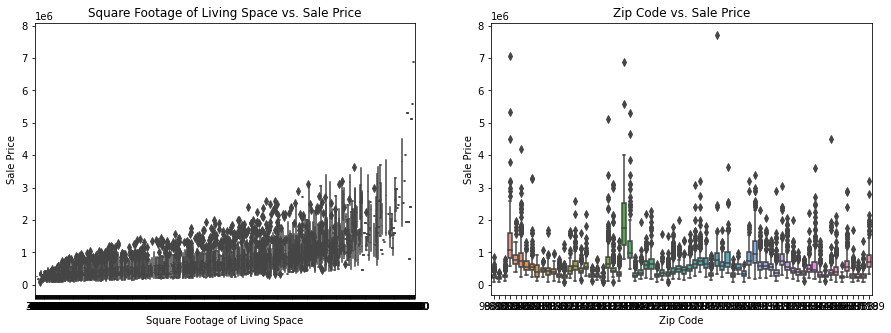

In [27]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x='sqft_living',
    y='price',
    data=df,
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x='zipcode',
    y='price',
    data=df,
    ax=ax2
)

# Customize labels
ax1.set_title("Square Footage of Living Space vs. Sale Price")
ax1.set_xlabel("Square Footage of Living Space")
ax1.set_ylabel("Sale Price")
ax2.set_title("Zip Code vs. Sale Price")
ax2.set_xlabel("Zip Code")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [28]:
# Replace None with appropriate text
"""
There is positive correlation between price and size of square feets.The boxplot shows that some zip codes have much higher median prices than others, as indicated by the height of the boxes. Additionally, the spread of prices within each zip code also appears to vary, as indicated by the length of the boxes. This suggests that zip code may be a useful predictor of price, and should be included in any predictive models that aim to estimate the sale price of a house. However, it's worth noting that zip code alone is unlikely to be a perfect predictor of price, as there are likely to be other factors that also influence the sale price of a house
"""

"\nThere is positive correlation between price and size of square feets.The boxplot shows that some zip codes have much higher median prices than others, as indicated by the height of the boxes. Additionally, the spread of prices within each zip code also appears to vary, as indicated by the length of the boxes. This suggests that zip code may be a useful predictor of price, and should be included in any predictive models that aim to estimate the sale price of a house. However, it's worth noting that zip code alone is unlikely to be a perfect predictor of price, as there are likely to be other factors that also influence the sale price of a house\n"

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [31]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,245000.0,2,1.00,670,1675,1.0,0,0,5,6,670,0,1960,0,98144,47.5918,-122.295,1220,1740
16609,275000.0,4,2.00,1480,15000,1.0,0,0,4,7,1480,0,1957,0,98055,47.4312,-122.196,1450,8768
16610,270000.0,3,2.00,2330,8000,1.0,0,0,3,7,1390,940,1986,0,98023,47.2958,-122.368,1570,7227
16611,767250.0,4,3.00,2170,2500,2.0,0,0,3,8,1710,460,1997,0,98115,47.6742,-122.303,2170,4080


In [33]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

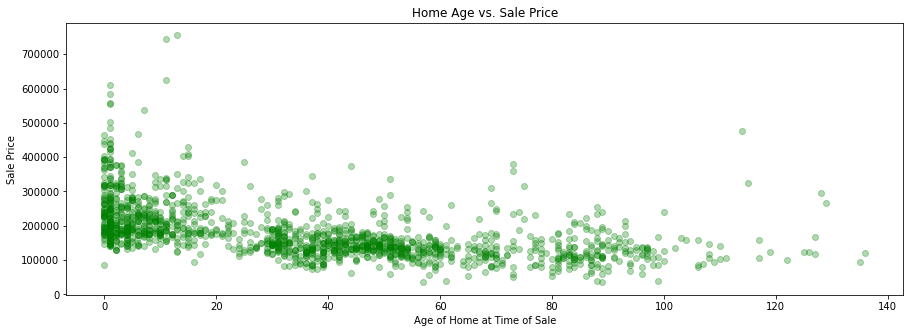

In [34]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [35]:
# Replace None with appropriate text
"""
It can be noted that is scattered within period of  to \n60 years. this implies that sales prices are high when the houses are new and decline as the houses become old
"""

'\nIt can be noted that is scattered within period of  to \n60 years. this implies that sales prices are high when the houses are new and decline as the houses become old\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.